# Exploração de dados

Este notebook tem o intuito de realizar uma exploração dos dados de dois cripto ativos, para assim, posteriormente, fazer a escolha do melhor modelo para indicar o melhor momento para compra e venda desses ativos.

In [25]:
# Importando as dependências
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir estilo dos gráficos
sns.set(style="whitegrid")

In [9]:
btc = yf.download('BTC-USD', start='2020-01-01', end='2024-07-01')
sol = yf.download('SOL-USD', start='2020-01-01', end='2024-07-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
btc_data = yf.Ticker('BTC-USD')
btc_data = btc_data.history(period='1y')
btc_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-08-30 00:00:00+00:00,27726.083984,27760.160156,27069.207031,27297.265625,16343655235,0.0,0.0
2023-08-31 00:00:00+00:00,27301.929688,27456.078125,25752.929688,25931.472656,20181001451,0.0,0.0
2023-09-01 00:00:00+00:00,25934.021484,26125.869141,25362.609375,25800.724609,17202862221,0.0,0.0
2023-09-02 00:00:00+00:00,25800.910156,25970.285156,25753.093750,25868.798828,10100387473,0.0,0.0
2023-09-03 00:00:00+00:00,25869.472656,26087.148438,25817.031250,25969.566406,8962524523,0.0,0.0


In [11]:
sol_data = yf.Ticker('SOL-USD')
sol_data = sol_data.history(period='1y')
sol_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-08-30 00:00:00+00:00,21.782026,21.932714,20.641665,20.834904,292322455,0.0,0.0
2023-08-31 00:00:00+00:00,20.833838,21.007214,19.549763,19.735092,343649256,0.0,0.0
2023-09-01 00:00:00+00:00,19.734756,19.907936,19.092510,19.327845,286842939,0.0,0.0
2023-09-02 00:00:00+00:00,19.328524,19.666084,19.188915,19.493744,200858690,0.0,0.0
2023-09-03 00:00:00+00:00,19.494253,19.657276,19.280931,19.578747,164570332,0.0,0.0


In [12]:
btc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1.643000e+03
mean,32264.144940,32983.159169,31498.704638,32295.391546,32295.391546,3.203590e+10
std,17540.274002,17954.421003,17068.554623,17542.516436,17542.516436,1.835047e+10
min,5002.578125,5331.833984,4106.980957,4970.788086,4970.788086,5.331173e+09
25%,18913.796875,19306.714844,18402.955078,18977.327148,18977.327148,2.015159e+10
50%,29357.093750,29930.564453,28963.833984,29374.152344,29374.152344,2.897021e+10
75%,43956.626953,44753.009766,42926.246094,43975.527344,43975.527344,3.926614e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


In [13]:
sol.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1.543000e+03
mean,56.218648,58.663802,53.797394,56.295464,56.295464,1.323916e+09
std,60.053805,62.421177,57.453542,60.045055,60.045055,1.663736e+09
min,0.513391,0.559759,0.505194,0.515273,0.515273,6.520200e+05
25%,14.177154,14.797383,13.645762,14.204813,14.204813,2.039915e+08
50%,30.841738,32.205086,29.429859,30.848087,30.848087,7.311451e+08
75%,94.216286,98.200890,90.821583,94.214661,94.214661,1.956531e+09
max,258.781555,260.062103,246.122421,258.934326,258.934326,1.706864e+10


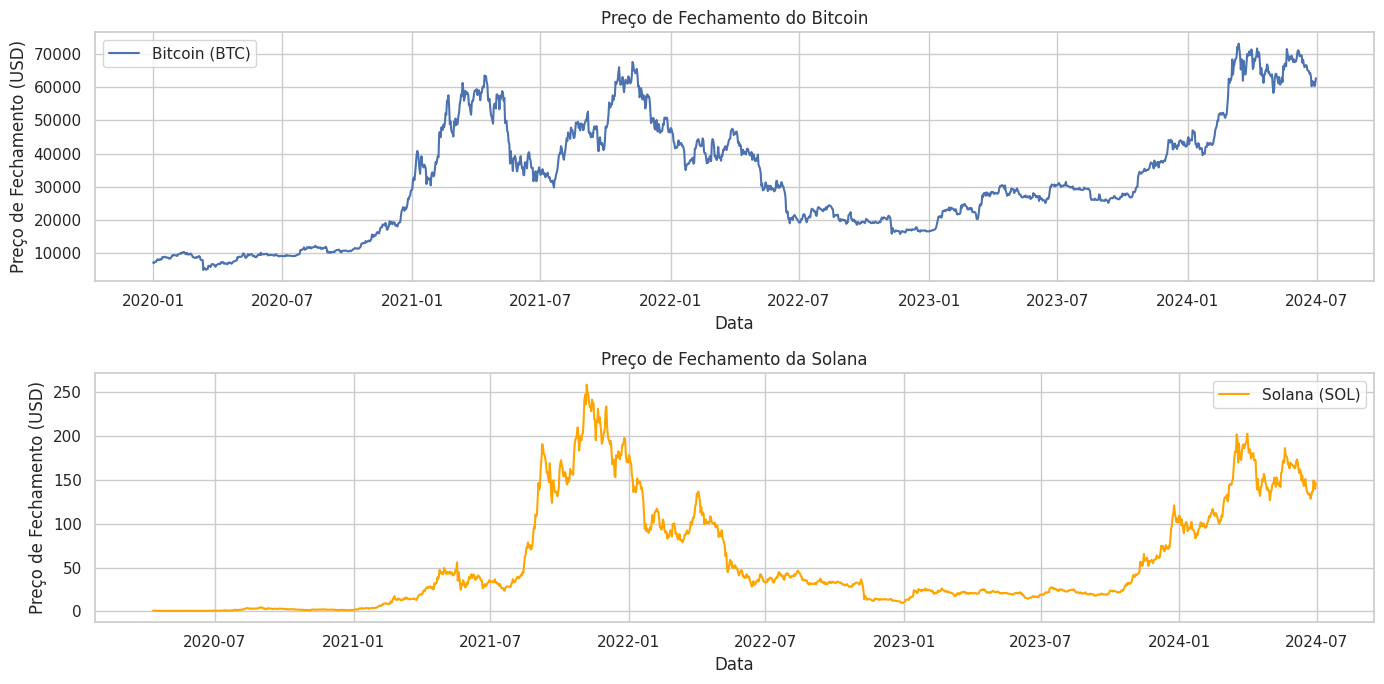

In [14]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(btc.index, btc['Close'], label='Bitcoin (BTC)')
plt.title('Preço de Fechamento do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(sol.index, sol['Close'], label='Solana (SOL)', color='orange')
plt.title('Preço de Fechamento da Solana')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
# Juntar os dados em um único DataFrame
data = pd.DataFrame({
    'BTC_Close': btc['Close'],
    'SOL_Close': sol['Close']
})

# Calcular correlação
correlation = data.corr()
correlation

,BTC_Close,SOL_Close
BTC_Close,1.000000,0.784645
SOL_Close,0.784645,1.000000


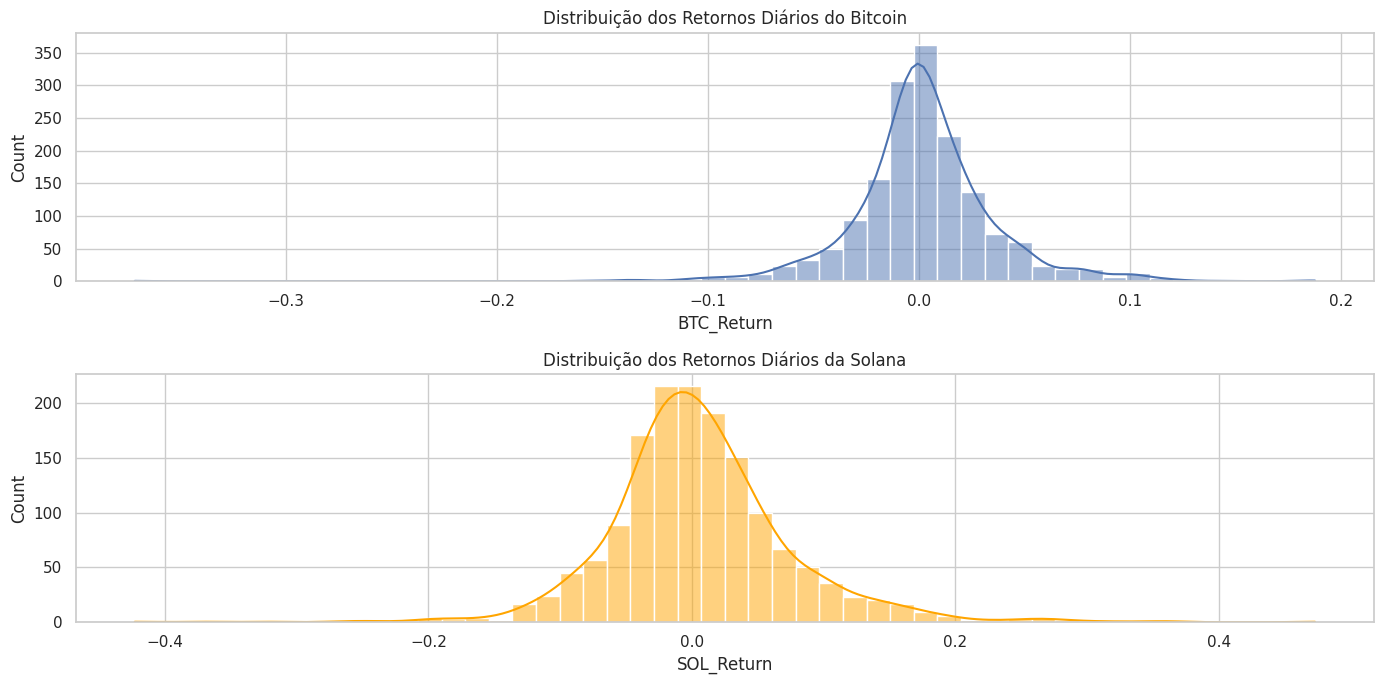

In [16]:
# Calcular retornos diários
data['BTC_Return'] = data['BTC_Close'].pct_change()
data['SOL_Return'] = data['SOL_Close'].pct_change()

# Plotar distribuição dos retornos
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
sns.histplot(data['BTC_Return'].dropna(), bins=50, kde=True)
plt.title('Distribuição dos Retornos Diários do Bitcoin')

plt.subplot(2, 1, 2)
sns.histplot(data['SOL_Return'].dropna(), bins=50, kde=True, color='orange')
plt.title('Distribuição dos Retornos Diários da Solana')

plt.tight_layout()
plt.show()

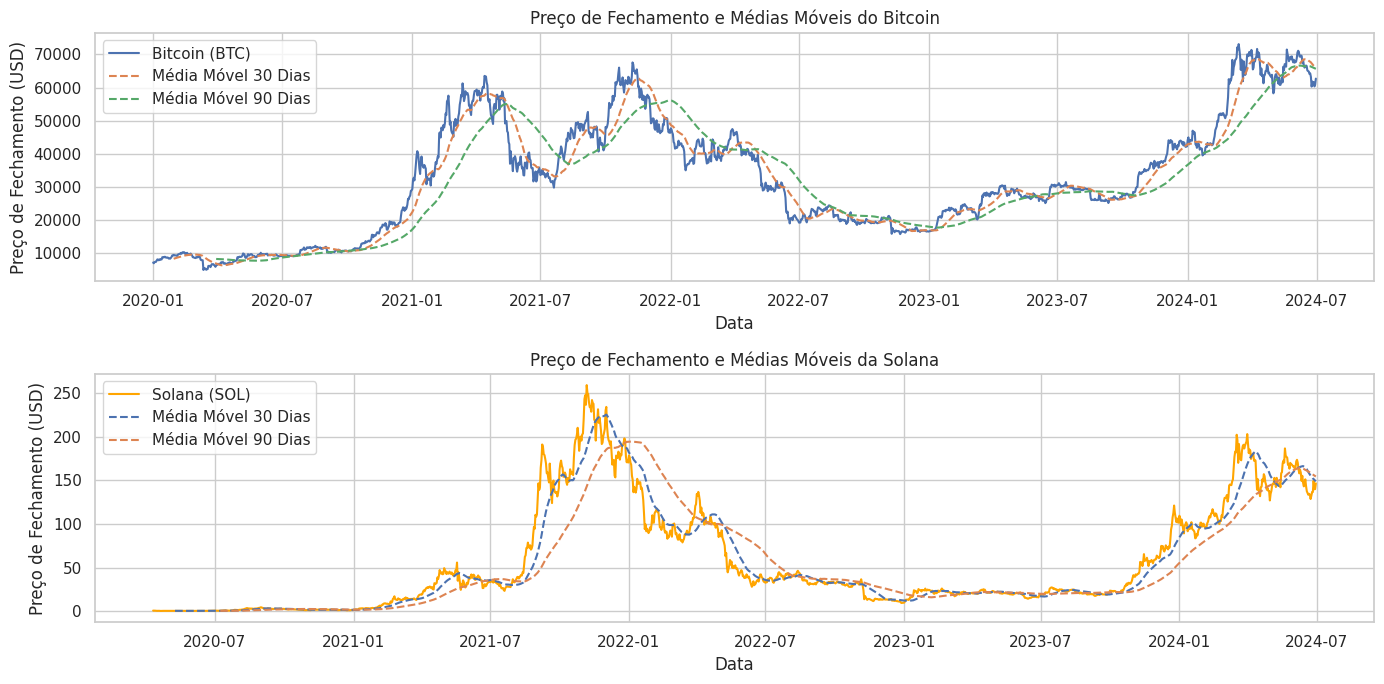

In [17]:
# Calcular médias móveis
data['BTC_MA_30'] = data['BTC_Close'].rolling(window=30).mean()
data['BTC_MA_90'] = data['BTC_Close'].rolling(window=90).mean()
data['SOL_MA_30'] = data['SOL_Close'].rolling(window=30).mean()
data['SOL_MA_90'] = data['SOL_Close'].rolling(window=90).mean()

# Plotar médias móveis
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(data.index, data['BTC_Close'], label='Bitcoin (BTC)')
plt.plot(data.index, data['BTC_MA_30'], label='Média Móvel 30 Dias', linestyle='--')
plt.plot(data.index, data['BTC_MA_90'], label='Média Móvel 90 Dias', linestyle='--')
plt.title('Preço de Fechamento e Médias Móveis do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data.index, data['SOL_Close'], label='Solana (SOL)', color='orange')
plt.plot(data.index, data['SOL_MA_30'], label='Média Móvel 30 Dias', linestyle='--')
plt.plot(data.index, data['SOL_MA_90'], label='Média Móvel 90 Dias', linestyle='--')
plt.title('Preço de Fechamento e Médias Móveis da Solana')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.legend()

plt.tight_layout()
plt.show()


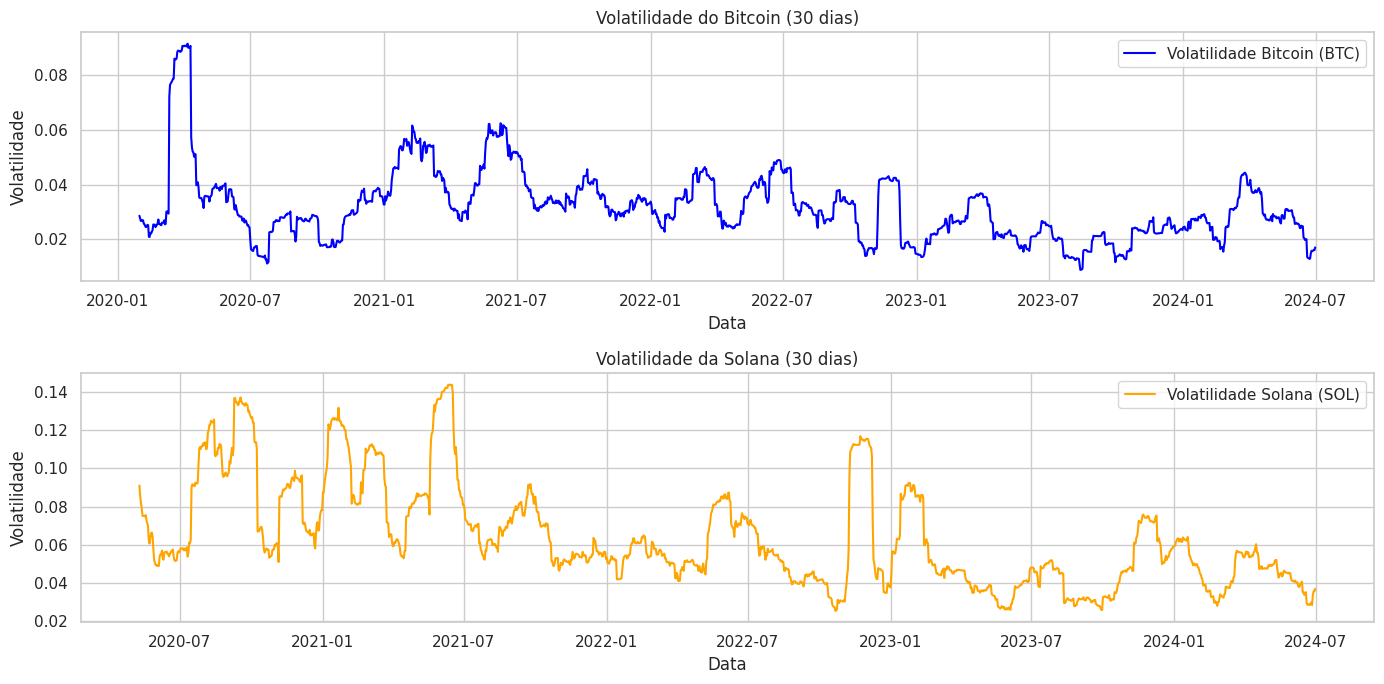

In [18]:
# Calcular volatilidade como o desvio padrão dos retornos diários
data['BTC_Volatility'] = data['BTC_Return'].rolling(window=30).std()
data['SOL_Volatility'] = data['SOL_Return'].rolling(window=30).std()

# Plotar volatilidade
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(data.index, data['BTC_Volatility'], label='Volatilidade Bitcoin (BTC)', color='blue')
plt.title('Volatilidade do Bitcoin (30 dias)')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data.index, data['SOL_Volatility'], label='Volatilidade Solana (SOL)', color='orange')
plt.title('Volatilidade da Solana (30 dias)')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.legend()

plt.tight_layout()
plt.show()


In [19]:
def calculate_bollinger_bands(prices, window=20, num_sd=2):
    rolling_mean = prices['Close'].rolling(window=window).mean()
    rolling_std = prices['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_sd)
    lower_band = rolling_mean - (rolling_std * num_sd)
    return rolling_mean, upper_band, lower_band


# Calcular Bandas de Bollinger para Ethereum
eth_data = pd.DataFrame({
    'Close': data['BTC_Close']
})
data['BTC_MA_BB'], data['BTC_Upper_BB'], data['BTC_Lower_BB'] = calculate_bollinger_bands(eth_data)

# Calcular Bandas de Bollinger para Solana
sol_data = pd.DataFrame({
    'Close': data['SOL_Close']
})
data['SOL_MA_BB'], data['SOL_Upper_BB'], data['SOL_Lower_BB'] = calculate_bollinger_bands(sol_data)


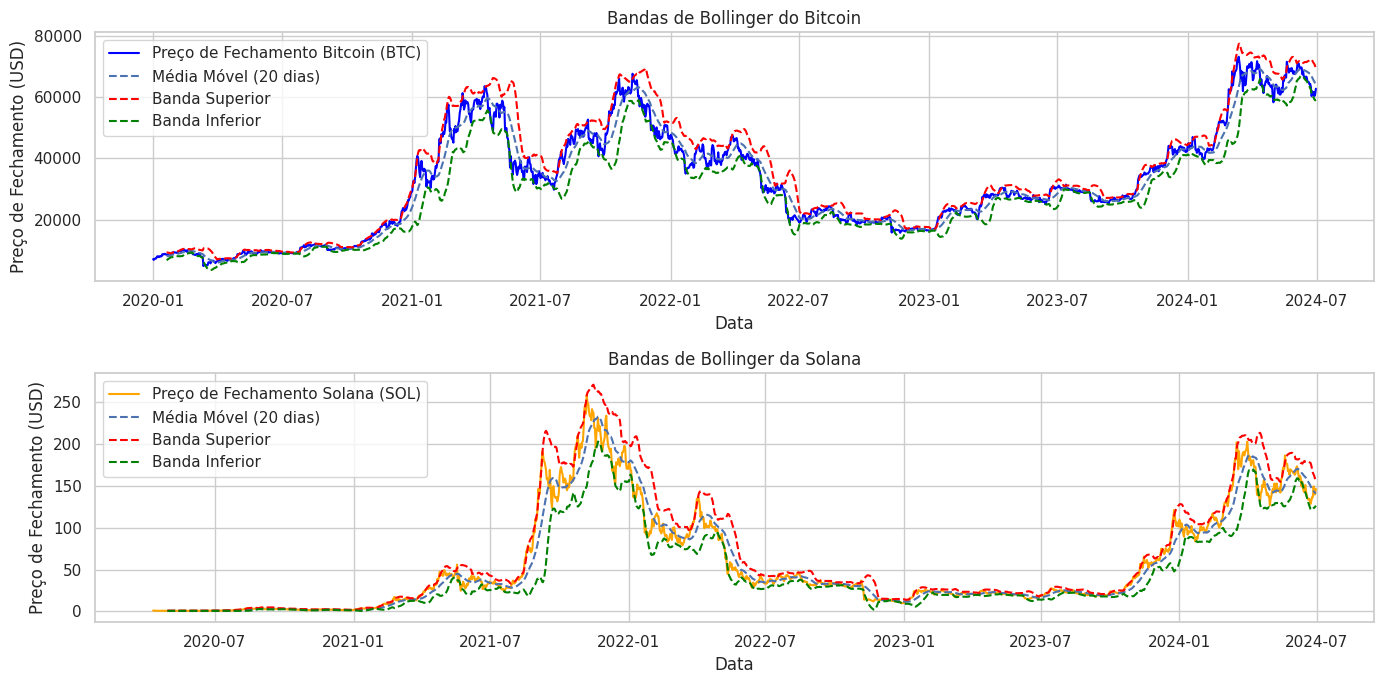

6

In [20]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(data.index, data['BTC_Close'], label='Preço de Fechamento Bitcoin (BTC)', color='blue')
plt.plot(data.index, data['BTC_MA_BB'], label='Média Móvel (20 dias)', linestyle='--')
plt.plot(data.index, data['BTC_Upper_BB'], label='Banda Superior', linestyle='--', color='red')
plt.plot(data.index, data['BTC_Lower_BB'], label='Banda Inferior', linestyle='--', color='green')
plt.title('Bandas de Bollinger do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data.index, data['SOL_Close'], label='Preço de Fechamento Solana (SOL)', color='orange')
plt.plot(data.index, data['SOL_MA_BB'], label='Média Móvel (20 dias)', linestyle='--')
plt.plot(data.index, data['SOL_Upper_BB'], label='Banda Superior', linestyle='--', color='red')
plt.plot(data.index, data['SOL_Lower_BB'], label='Banda Inferior', linestyle='--', color='green')
plt.title('Bandas de Bollinger da Solana')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.legend()

plt.tight_layout()
plt.show()
6

/tmp/ipykernel_26026/3983516738.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data.resample('M').ffill()


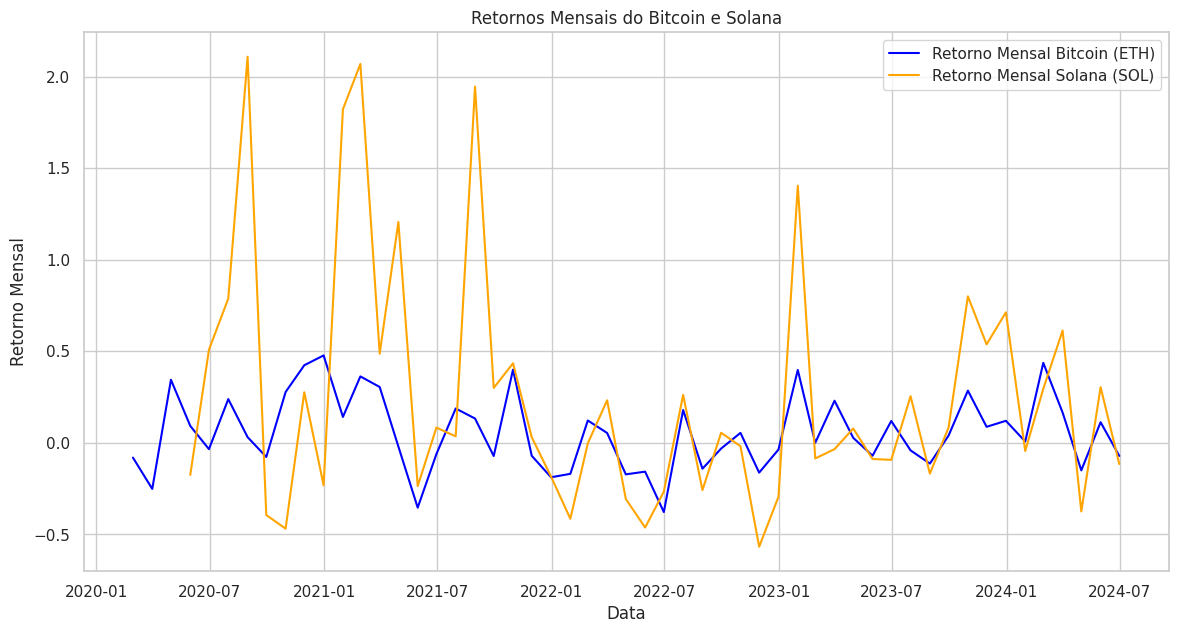

In [21]:
# Resample para retornos mensais
data_monthly = data.resample('M').ffill()
data_monthly['BTC_Monthly_Return'] = data_monthly['BTC_Close'].pct_change()
data_monthly['SOL_Monthly_Return'] = data_monthly['SOL_Close'].pct_change()

# Plotar retornos mensais
plt.figure(figsize=(14, 7))

plt.plot(data_monthly.index, data_monthly['BTC_Monthly_Return'], label='Retorno Mensal Bitcoin (ETH)', color='blue')
plt.plot(data_monthly.index, data_monthly['SOL_Monthly_Return'], label='Retorno Mensal Solana (SOL)', color='orange')
plt.title('Retornos Mensais do Bitcoin e Solana')
plt.xlabel('Data')
plt.ylabel('Retorno Mensal')
plt.legend()
plt.show()


In [22]:
# Calcular a média móvel simples (SMA) de 30 dias para Solana
data["SOL_SMA_30"] = data["SOL_Close"].rolling(window=30).mean()

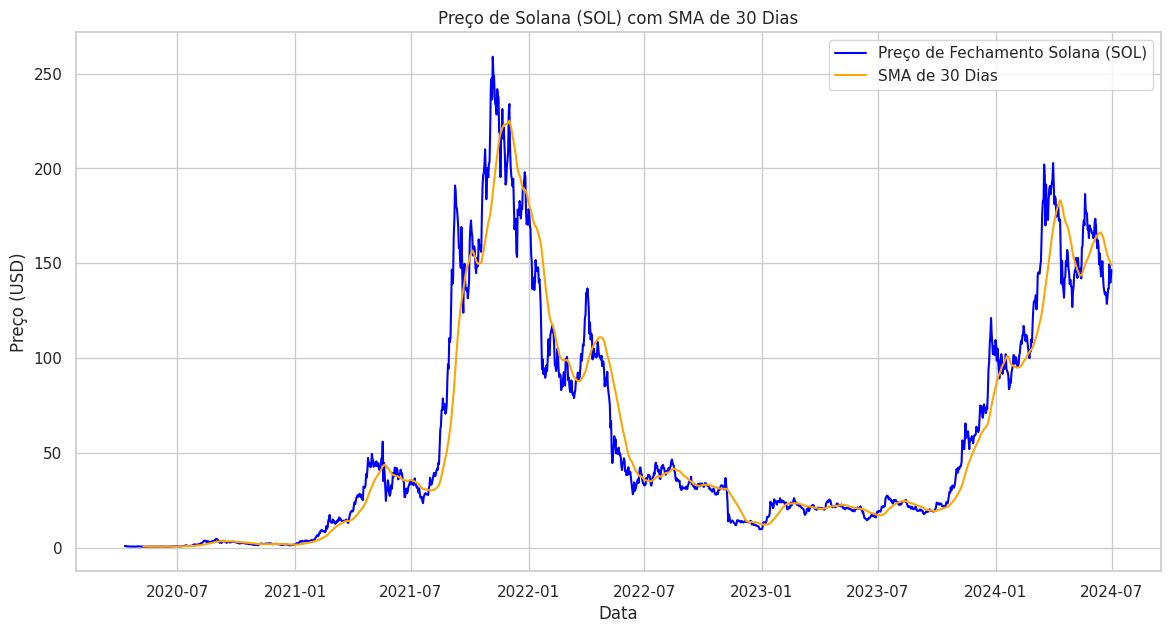

In [23]:
# Visualizar os dados de Solana com a SMA de 30 dias
plt.figure(figsize=(14, 7))
plt.plot(data["SOL_Close"], label="Preço de Fechamento Solana (SOL)", color="blue")
plt.plot(data["SOL_SMA_30"], label="SMA de 30 Dias", color="orange")
plt.title("Preço de Solana (SOL) com SMA de 30 Dias")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.legend()
plt.show()


In [26]:
# Identificar sinais de compra e venda para Solana com base na SMA
data["Signal"] = 0
data["Signal"][30:] = np.where(data["SOL_Close"][30:] > data["SOL_SMA_30"][30:], 1, 0)  # Compra se preço acima da SMA
data["Position"] = data["Signal"].diff()


/tmp/ipykernel_26026/3746313303.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["Signal"][30:] = np.where(data["SOL_Close"][30:] > data["SOL_SMA_30"][30:], 1, 0)  # Compra se preço acima da SMA
/tmp/ipykernel_26026/3746313303.py:3: 

In [27]:
# Exibir os últimos 10 registros com os sinais de compra e venda para Solana
print(data[["SOL_Close", "SOL_SMA_30", "Position"]].tail(10))

             SOL_Close  SOL_SMA_30  Position
Date                                        
2024-06-21  134.588303  158.065337       0.0
2024-06-22  133.670242  156.654819       0.0
2024-06-23  128.590424  155.347935       0.0
2024-06-24  132.241394  154.141394       0.0
2024-06-25  136.559204  153.248337       0.0
2024-06-26  136.609146  152.135438       0.0
2024-06-27  149.448380  151.495355       0.0
2024-06-28  139.703400  150.549713       0.0
2024-06-29  140.010147  149.650833       0.0
2024-06-30  146.492493  149.012659       0.0


In [28]:
data["BTC_SMA_30"] = data["BTC_Close"].rolling(window=30).mean()

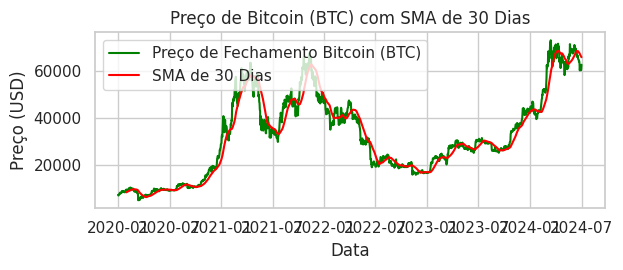

In [29]:
plt.subplot(2, 1, 2)
plt.plot(data["BTC_Close"], label="Preço de Fechamento Bitcoin (BTC)", color="green")
plt.plot(data["BTC_SMA_30"], label="SMA de 30 Dias", color="red")
plt.title("Preço de Bitcoin (BTC) com SMA de 30 Dias")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
data["BTC_Signal"] = 0
data["BTC_Signal"][30:] = np.where(data["BTC_Close"][30:] > data["BTC_SMA_30"][30:], 1, 0)
data["BTC_Position"] = data["BTC_Signal"].diff()

/tmp/ipykernel_26026/3716098983.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["BTC_Signal"][30:] = np.where(data["BTC_Close"][30:] > data["BTC_SMA_30"][30:], 1, 0)
/tmp/ipykernel_26026/3716098983.py:2: SettingWithCopyWarning: 
A v

In [31]:
print("\nSinais de Bitcoin:")
print(data[["BTC_Close", "BTC_SMA_30", "BTC_Position"]].tail(10))


Sinais de Bitcoin:
               BTC_Close    BTC_SMA_30  BTC_Position
Date                                                
2024-06-21  64096.199219  67884.387760           0.0
2024-06-22  64252.578125  67761.821615           0.0
2024-06-23  63180.796875  67583.644792           0.0
2024-06-24  60277.414062  67284.027083           0.0
2024-06-25  61804.640625  67060.245313           0.0
2024-06-26  60811.277344  66774.136068           0.0
2024-06-27  61604.800781  66551.088802           0.0
2024-06-28  60320.136719  66309.156901           0.0
2024-06-29  60887.378906  66059.903125           0.0
2024-06-30  62678.292969  65899.465755           0.0


# ARIMAX